In [1]:
!pip install tensorflow==2.4.1 tensorflowflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install sklearn

  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\admin\AppData\Local\Temp\pip-install-ph06jqnj\sklearn_cdd50ab78f5e4f469c92861860104fe3\setup.py", line 10, in <module>
      LONG_DESCRIPTION = f.read()
    File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned a

In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install mediapipe --user

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tensorflow-gpu --user

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\admin\AppData\Local\Temp\pip-install-qc0fmtf9\tensorflow-gpu_cf24cb5274d44a0e965611d4602abab1\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml-


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


In [13]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [14]:
mp_holistic = mp.solutions.holistic #Holistic Model
mp_drawing = mp.solutions.drawing_utils #Drawing Utilities

In [15]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #COLOR CONVERSION BGR TO RGB
    image.flags.writeable = False #Image has to be no longer writeable
    results = model.process(image) #Making predictions
    image.flags.writeable = True #Makinng the image writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #COLOR CONVERSION RGB TO BGR
    return image, results



In [16]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)



In [17]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                                                                                mp_drawing.DrawingSpec(color=(80,250,10), thickness=1, circle_radius=1))
   
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS , mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                                                                                mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
   
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                                                                                mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
   
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                                                                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [18]:
cap = cv2.VideoCapture(0)
#Setting up mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    
    #Read Feed
    ret, frame = cap.read()
    
    #Making detections
    image, results = mediapipe_detection(frame, holistic)
    print(results)

    #drawing landmarks
    draw_styled_landmarks(image, results)
    
    #Popping up the camera feed
    cv2.imshow('OpenCV feed', image)
    
    #Providing a key for quitting camera
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
  cap.release()
  cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [153]:
cap.release()
cv2.destroyAllWindows()

In [20]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [21]:
face

NameError: name 'face' is not defined

In [22]:
results.left_hand_landmarks.landmark

AttributeError: 'NoneType' object has no attribute 'landmark'

In [22]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

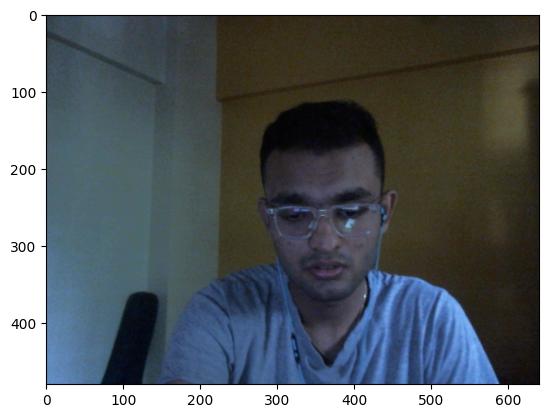

In [23]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [24]:
results

mediapipe.python.solution_base.SolutionOutputs

In [25]:
draw_styled_landmarks(frame, results)

In [26]:
results.pose_landmarks.landmark[0].visibility

0.9999111890792847

In [27]:
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [28]:
pose

[array([ 0.57516474,  0.60058367, -0.98932046,  0.99991119]),
 array([ 0.60488307,  0.53007913, -0.96059006,  0.99981105]),
 array([ 0.62330413,  0.52747709, -0.96064693,  0.99979866]),
 array([ 0.63936341,  0.52622253, -0.96126157,  0.99979854]),
 array([ 0.54292351,  0.53618199, -0.96412593,  0.99982822]),
 array([ 0.52396548,  0.53655249, -0.96324044,  0.99983823]),
 array([ 0.50870728,  0.53730589, -0.9633773 ,  0.9998309 ]),
 array([ 0.65841204,  0.53523564, -0.59149468,  0.9998008 ]),
 array([ 0.48961839,  0.54575515, -0.57463157,  0.99989533]),
 array([ 0.61526692,  0.65915745, -0.83483326,  0.99992913]),
 array([ 0.53765285,  0.67132944, -0.82996666,  0.99993855]),
 array([ 0.80207872,  0.83737081, -0.30523339,  0.99951154]),
 array([ 0.36332154,  0.83418256, -0.35030895,  0.99973309]),
 array([ 0.88873482,  1.22425485, -0.21696417,  0.32726681]),
 array([ 0.26758489,  1.22749269, -0.24882872,  0.63298237]),
 array([ 0.89512765,  1.53811777, -0.52347898,  0.08056284]),
 array([

In [29]:
len(pose)

33

In [30]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [31]:
if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()  
else: 
    np.zeros(1404)

In [32]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [33]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
result_test = extract_keypoints(results)

In [35]:
result_test

array([ 0.57516474,  0.60058367, -0.98932046, ...,  0.        ,
        0.        ,  0.        ])

In [36]:
np.zeros(21*3).shape

(63,)

In [37]:
np.save('0', result_test)

In [38]:
np.load('0.npy')

array([ 0.57516474,  0.60058367, -0.98932046, ...,  0.        ,
        0.        ,  0.        ])

In [154]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou', 'yes', 'no', 'please', 'goodbye', 'sorry', 'youarewelcome', 'eat'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [155]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [156]:
import platform
platform.architecture()

('64bit', 'WindowsPE')

In [157]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [232]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [159]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

False

In [160]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4826566854886268681
xla_global_id: -1
]


In [161]:
cap.release()
cv2.destroyAllWindows()

In [162]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [163]:
label_map = {label:num for num, label in enumerate(actions)}

In [164]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'yes': 3,
 'no': 4,
 'please': 5,
 'goodbye': 6,
 'sorry': 7,
 'youarewelcome': 8,
 'eat': 9}

In [165]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [166]:
np.array(sequences).shape

(300, 30, 1662)

In [167]:
np.array(labels).shape

(300,)

In [168]:
X = np.array(sequences)

In [169]:
X.shape

(300, 30, 1662)

In [170]:
y = to_categorical(labels).astype(int)

In [171]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [173]:
y_test.shape

(15, 10)

In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [175]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [176]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [177]:
[actions.shape[0]]

[10]

In [178]:
res = [0.7, 0.2, 0.1]

In [179]:
np.argmax(res)

0

In [180]:
actions[np.argmax(res)]

'hello'

In [181]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [182]:
model.fit(X_train, y_train, epochs=2500, callbacks=[tb_callback])

Epoch 1/2500
9/9 [==============================] - 6s 131ms/step - loss: 2.5194 - categorical_accuracy: 0.1018
Epoch 2/2500
9/9 [==============================] - 1s 133ms/step - loss: 2.3234 - categorical_accuracy: 0.1088
Epoch 3/2500
9/9 [==============================] - 1s 130ms/step - loss: 2.2819 - categorical_accuracy: 0.1649
Epoch 4/2500
9/9 [==============================] - 1s 141ms/step - loss: 2.2749 - categorical_accuracy: 0.0877
Epoch 5/2500
9/9 [==============================] - 1s 147ms/step - loss: 2.2943 - categorical_accuracy: 0.1509
Epoch 6/2500
9/9 [==============================] - 1s 135ms/step - loss: 2.3143 - categorical_accuracy: 0.0877
Epoch 7/2500
9/9 [==============================] - 1s 130ms/step - loss: 2.2980 - categorical_accuracy: 0.1228
Epoch 8/2500
9/9 [==============================] - 1s 132ms/step - loss: 2.3015 - categorical_accuracy: 0.0912
Epoch 9/2500
9/9 [==============================] - 1s 132ms/step - loss: 2.3151 - categorical_accuracy:

9/9 [==============================] - 1s 137ms/step - loss: 2.3012 - categorical_accuracy: 0.1053
Epoch 74/2500
9/9 [==============================] - 1s 129ms/step - loss: 2.3012 - categorical_accuracy: 0.1053
Epoch 75/2500
9/9 [==============================] - 1s 146ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 76/2500
9/9 [==============================] - 1s 139ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 77/2500
9/9 [==============================] - 1s 139ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 78/2500
9/9 [==============================] - 1s 135ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 79/2500
9/9 [==============================] - 1s 140ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 80/2500
9/9 [==============================] - 1s 157ms/step - loss: 2.3011 - categorical_accuracy: 0.0877
Epoch 81/2500
9/9 [==============================] - 1s 143ms/step - loss: 2.3011 - categorical_accuracy: 0.08

9/9 [==============================] - 1s 144ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 146/2500
9/9 [==============================] - 1s 163ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 147/2500
9/9 [==============================] - 1s 148ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 148/2500
9/9 [==============================] - 1s 148ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 149/2500
9/9 [==============================] - 2s 171ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 150/2500
9/9 [==============================] - 1s 150ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 151/2500
9/9 [==============================] - 1s 150ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 152/2500
9/9 [==============================] - 1s 140ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 153/2500
9/9 [==============================] - 1s 150ms/step - loss: 2.3010 - categorical_accura

Epoch 217/2500
9/9 [==============================] - 1s 127ms/step - loss: 2.3011 - categorical_accuracy: 0.0702
Epoch 218/2500
9/9 [==============================] - 1s 141ms/step - loss: 2.3011 - categorical_accuracy: 0.0737
Epoch 219/2500
9/9 [==============================] - 1s 152ms/step - loss: 2.3010 - categorical_accuracy: 0.0807
Epoch 220/2500
9/9 [==============================] - 1s 150ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 221/2500
9/9 [==============================] - 1s 159ms/step - loss: 2.3011 - categorical_accuracy: 0.1088
Epoch 222/2500
9/9 [==============================] - 1s 146ms/step - loss: 2.3011 - categorical_accuracy: 0.0982
Epoch 223/2500
9/9 [==============================] - 1s 151ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 224/2500
9/9 [==============================] - 1s 136ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 225/2500
9/9 [==============================] - 1s 143ms/step - loss: 2.3011 - cat

9/9 [==============================] - 1s 151ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 289/2500
9/9 [==============================] - 1s 139ms/step - loss: 2.3010 - categorical_accuracy: 0.0982
Epoch 290/2500
9/9 [==============================] - 1s 145ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 291/2500
9/9 [==============================] - 1s 131ms/step - loss: 2.3010 - categorical_accuracy: 0.0982
Epoch 292/2500
9/9 [==============================] - 1s 145ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 293/2500
9/9 [==============================] - 1s 145ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 294/2500
9/9 [==============================] - 1s 146ms/step - loss: 2.3011 - categorical_accuracy: 0.0807
Epoch 295/2500
9/9 [==============================] - 1s 129ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 296/2500
9/9 [==============================] - 1s 148ms/step - loss: 2.3011 - categorical_accura

Epoch 360/2500
9/9 [==============================] - 1s 139ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 361/2500
9/9 [==============================] - 1s 138ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 362/2500
9/9 [==============================] - 1s 146ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 363/2500
9/9 [==============================] - 1s 138ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 364/2500
9/9 [==============================] - 1s 135ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 365/2500
9/9 [==============================] - 1s 131ms/step - loss: 2.3012 - categorical_accuracy: 0.1053
Epoch 366/2500
9/9 [==============================] - 1s 139ms/step - loss: 2.3011 - categorical_accuracy: 0.0807
Epoch 367/2500
9/9 [==============================] - 1s 135ms/step - loss: 2.3011 - categorical_accuracy: 0.0912
Epoch 368/2500
9/9 [==============================] - 1s 132ms/step - loss: 2.3011 - cat

9/9 [==============================] - 1s 128ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 432/2500
9/9 [==============================] - 1s 129ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 433/2500
9/9 [==============================] - 1s 126ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 434/2500
9/9 [==============================] - 1s 141ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 435/2500
9/9 [==============================] - 1s 128ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 436/2500
9/9 [==============================] - 1s 130ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 437/2500
9/9 [==============================] - 1s 130ms/step - loss: 2.3011 - categorical_accuracy: 0.0842
Epoch 438/2500
9/9 [==============================] - 1s 136ms/step - loss: 2.3012 - categorical_accuracy: 0.1053
Epoch 439/2500
9/9 [==============================] - 1s 138ms/step - loss: 2.3010 - categorical_accura

Epoch 503/2500
9/9 [==============================] - 1s 131ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 504/2500
9/9 [==============================] - 1s 134ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 505/2500
9/9 [==============================] - 1s 133ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 506/2500
9/9 [==============================] - 1s 128ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 507/2500
9/9 [==============================] - 1s 126ms/step - loss: 2.3010 - categorical_accuracy: 0.0772
Epoch 508/2500
9/9 [==============================] - 1s 127ms/step - loss: 2.3011 - categorical_accuracy: 0.0877
Epoch 509/2500
9/9 [==============================] - 1s 136ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 510/2500
9/9 [==============================] - 1s 139ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 511/2500
9/9 [==============================] - 1s 134ms/step - loss: 2.3011 - cat

9/9 [==============================] - 2s 171ms/step - loss: 2.3012 - categorical_accuracy: 0.1018
Epoch 575/2500
9/9 [==============================] - 2s 209ms/step - loss: 2.3010 - categorical_accuracy: 0.0982
Epoch 576/2500
9/9 [==============================] - 1s 151ms/step - loss: 2.3010 - categorical_accuracy: 0.0807
Epoch 577/2500
9/9 [==============================] - 1s 152ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 578/2500
9/9 [==============================] - 2s 167ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 579/2500
9/9 [==============================] - 1s 138ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 580/2500
9/9 [==============================] - 1s 136ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 581/2500
9/9 [==============================] - 1s 133ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 582/2500
9/9 [==============================] - 1s 141ms/step - loss: 2.3010 - categorical_accura

Epoch 646/2500
9/9 [==============================] - 1s 128ms/step - loss: 2.3010 - categorical_accuracy: 0.1018
Epoch 647/2500
9/9 [==============================] - 1s 133ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 648/2500
9/9 [==============================] - 1s 135ms/step - loss: 2.3011 - categorical_accuracy: 0.0737
Epoch 649/2500
9/9 [==============================] - 1s 131ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 650/2500
9/9 [==============================] - 1s 136ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 651/2500
9/9 [==============================] - 1s 129ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 652/2500
9/9 [==============================] - 1s 125ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 653/2500
9/9 [==============================] - 1s 133ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 654/2500
9/9 [==============================] - 1s 129ms/step - loss: 2.3010 - cat

9/9 [==============================] - 1s 143ms/step - loss: 2.3012 - categorical_accuracy: 0.1053
Epoch 718/2500
9/9 [==============================] - 1s 149ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 719/2500
9/9 [==============================] - 1s 163ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 720/2500
9/9 [==============================] - 1s 149ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 721/2500
9/9 [==============================] - 1s 143ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 722/2500
9/9 [==============================] - 1s 157ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 723/2500
9/9 [==============================] - 1s 148ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 724/2500
9/9 [==============================] - 1s 144ms/step - loss: 2.3010 - categorical_accuracy: 0.0947
Epoch 725/2500
9/9 [==============================] - 1s 133ms/step - loss: 2.3011 - categorical_accura

Epoch 789/2500
9/9 [==============================] - 1s 140ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 790/2500
9/9 [==============================] - 1s 140ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 791/2500
9/9 [==============================] - 1s 144ms/step - loss: 2.3011 - categorical_accuracy: 0.0807
Epoch 792/2500
9/9 [==============================] - 1s 133ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 793/2500
9/9 [==============================] - 1s 134ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 794/2500
9/9 [==============================] - 1s 134ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 795/2500
9/9 [==============================] - 1s 135ms/step - loss: 2.3011 - categorical_accuracy: 0.0877
Epoch 796/2500
9/9 [==============================] - 1s 138ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 797/2500
9/9 [==============================] - 1s 135ms/step - loss: 2.3011 - cat

9/9 [==============================] - 1s 141ms/step - loss: 2.3011 - categorical_accuracy: 0.0877
Epoch 861/2500
9/9 [==============================] - 1s 138ms/step - loss: 2.3010 - categorical_accuracy: 0.0842
Epoch 862/2500
9/9 [==============================] - 1s 149ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 863/2500
9/9 [==============================] - 1s 142ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 864/2500
9/9 [==============================] - 1s 145ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 865/2500
9/9 [==============================] - 1s 138ms/step - loss: 2.3010 - categorical_accuracy: 0.0947
Epoch 866/2500
9/9 [==============================] - 1s 150ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 867/2500
9/9 [==============================] - 1s 144ms/step - loss: 2.3011 - categorical_accuracy: 0.0737
Epoch 868/2500
9/9 [==============================] - 1s 132ms/step - loss: 2.3012 - categorical_accura

Epoch 932/2500
9/9 [==============================] - 1s 162ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 933/2500
9/9 [==============================] - 2s 180ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 934/2500
9/9 [==============================] - 2s 215ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 935/2500
9/9 [==============================] - 2s 191ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 936/2500
9/9 [==============================] - 2s 176ms/step - loss: 2.3011 - categorical_accuracy: 0.0772
Epoch 937/2500
9/9 [==============================] - 2s 177ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 938/2500
9/9 [==============================] - 2s 206ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 939/2500
9/9 [==============================] - 2s 193ms/step - loss: 2.3010 - categorical_accuracy: 0.0842
Epoch 940/2500
9/9 [==============================] - 2s 194ms/step - loss: 2.3010 - cat

9/9 [==============================] - 1s 136ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1004/2500
9/9 [==============================] - 1s 135ms/step - loss: 2.3011 - categorical_accuracy: 0.0912
Epoch 1005/2500
9/9 [==============================] - 1s 132ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1006/2500
9/9 [==============================] - 1s 136ms/step - loss: 2.3011 - categorical_accuracy: 0.0596
Epoch 1007/2500
9/9 [==============================] - 1s 133ms/step - loss: 2.3012 - categorical_accuracy: 0.0842
Epoch 1008/2500
9/9 [==============================] - 1s 147ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1009/2500
9/9 [==============================] - 1s 159ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1010/2500
9/9 [==============================] - 1s 158ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1011/2500
9/9 [==============================] - 1s 135ms/step - loss: 2.3011 - categorica

9/9 [==============================] - 1s 146ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1075/2500
9/9 [==============================] - 1s 164ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 1076/2500
9/9 [==============================] - 1s 139ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 1077/2500
9/9 [==============================] - 1s 137ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 1078/2500
9/9 [==============================] - 1s 130ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1079/2500
9/9 [==============================] - 1s 130ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1080/2500
9/9 [==============================] - 1s 160ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1081/2500
9/9 [==============================] - 1s 139ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1082/2500
9/9 [==============================] - 1s 140ms/step - loss: 2.3011 - categorica

9/9 [==============================] - 1s 130ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1146/2500
9/9 [==============================] - 1s 138ms/step - loss: 2.3010 - categorical_accuracy: 0.1018
Epoch 1147/2500
9/9 [==============================] - 1s 143ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1148/2500
9/9 [==============================] - 1s 136ms/step - loss: 2.3010 - categorical_accuracy: 0.0877
Epoch 1149/2500
9/9 [==============================] - 1s 130ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1150/2500
9/9 [==============================] - 1s 131ms/step - loss: 2.3012 - categorical_accuracy: 0.1053
Epoch 1151/2500
9/9 [==============================] - 1s 128ms/step - loss: 2.3011 - categorical_accuracy: 0.0737
Epoch 1152/2500
9/9 [==============================] - 1s 129ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 1153/2500
9/9 [==============================] - 1s 128ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 1s 159ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1217/2500
9/9 [==============================] - 1s 148ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1218/2500
9/9 [==============================] - 1s 153ms/step - loss: 2.3011 - categorical_accuracy: 0.0982
Epoch 1219/2500
9/9 [==============================] - 1s 146ms/step - loss: 2.3011 - categorical_accuracy: 0.0842
Epoch 1220/2500
9/9 [==============================] - 1s 141ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1221/2500
9/9 [==============================] - 1s 141ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1222/2500
9/9 [==============================] - 1s 144ms/step - loss: 2.3010 - categorical_accuracy: 0.0947
Epoch 1223/2500
9/9 [==============================] - 1s 147ms/step - loss: 2.3010 - categorical_accuracy: 0.0982
Epoch 1224/2500
9/9 [==============================] - 1s 131ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 2s 176ms/step - loss: 2.3011 - categorical_accuracy: 0.0912
Epoch 1288/2500
9/9 [==============================] - 1s 150ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1289/2500
9/9 [==============================] - 1s 154ms/step - loss: 2.3012 - categorical_accuracy: 0.1053
Epoch 1290/2500
9/9 [==============================] - 1s 164ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1291/2500
9/9 [==============================] - 1s 141ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1292/2500
9/9 [==============================] - 1s 146ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1293/2500
9/9 [==============================] - 1s 148ms/step - loss: 2.3011 - categorical_accuracy: 0.0877
Epoch 1294/2500
9/9 [==============================] - 1s 151ms/step - loss: 2.3012 - categorical_accuracy: 0.1053
Epoch 1295/2500
9/9 [==============================] - 1s 145ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 1s 134ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1359/2500
9/9 [==============================] - 1s 146ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1360/2500
9/9 [==============================] - 1s 137ms/step - loss: 2.3011 - categorical_accuracy: 0.0772
Epoch 1361/2500
9/9 [==============================] - 1s 144ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1362/2500
9/9 [==============================] - 1s 155ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1363/2500
9/9 [==============================] - 1s 146ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1364/2500
9/9 [==============================] - 1s 149ms/step - loss: 2.3011 - categorical_accuracy: 0.0842
Epoch 1365/2500
9/9 [==============================] - 1s 149ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1366/2500
9/9 [==============================] - 1s 155ms/step - loss: 2.3011 - categorica

9/9 [==============================] - 1s 153ms/step - loss: 2.3010 - categorical_accuracy: 0.0947
Epoch 1430/2500
9/9 [==============================] - 1s 149ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1431/2500
9/9 [==============================] - 1s 153ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1432/2500
9/9 [==============================] - 1s 160ms/step - loss: 2.3010 - categorical_accuracy: 0.1018
Epoch 1433/2500
9/9 [==============================] - 1s 150ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 1434/2500
9/9 [==============================] - 1s 143ms/step - loss: 2.3011 - categorical_accuracy: 0.0912
Epoch 1435/2500
9/9 [==============================] - 1s 139ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1436/2500
9/9 [==============================] - 1s 151ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1437/2500
9/9 [==============================] - 1s 156ms/step - loss: 2.3011 - categorica

9/9 [==============================] - 1s 142ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1501/2500
9/9 [==============================] - 1s 151ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 1502/2500
9/9 [==============================] - 1s 168ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1503/2500
9/9 [==============================] - 1s 158ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1504/2500
9/9 [==============================] - 1s 150ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1505/2500
9/9 [==============================] - 1s 141ms/step - loss: 2.3012 - categorical_accuracy: 0.1053
Epoch 1506/2500
9/9 [==============================] - 1s 144ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1507/2500
9/9 [==============================] - 1s 154ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1508/2500
9/9 [==============================] - 1s 162ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 1s 133ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 1572/2500
9/9 [==============================] - 1s 135ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1573/2500
9/9 [==============================] - 1s 153ms/step - loss: 2.3010 - categorical_accuracy: 0.0877
Epoch 1574/2500
9/9 [==============================] - 1s 132ms/step - loss: 2.3010 - categorical_accuracy: 0.0737
Epoch 1575/2500
9/9 [==============================] - 1s 134ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1576/2500
9/9 [==============================] - 1s 134ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1577/2500
9/9 [==============================] - 1s 136ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1578/2500
9/9 [==============================] - 1s 135ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1579/2500
9/9 [==============================] - 1s 131ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 1s 138ms/step - loss: 2.3011 - categorical_accuracy: 0.0842
Epoch 1643/2500
9/9 [==============================] - 1s 146ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1644/2500
9/9 [==============================] - 1s 148ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1645/2500
9/9 [==============================] - 2s 172ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 1646/2500
9/9 [==============================] - 1s 156ms/step - loss: 2.3010 - categorical_accuracy: 0.0877
Epoch 1647/2500
9/9 [==============================] - 2s 181ms/step - loss: 2.3010 - categorical_accuracy: 0.0982
Epoch 1648/2500
9/9 [==============================] - 1s 158ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1649/2500
9/9 [==============================] - 1s 162ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1650/2500
9/9 [==============================] - 1s 153ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 1s 134ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1714/2500
9/9 [==============================] - 1s 134ms/step - loss: 2.3010 - categorical_accuracy: 0.0947
Epoch 1715/2500
9/9 [==============================] - 1s 129ms/step - loss: 2.3010 - categorical_accuracy: 0.0877
Epoch 1716/2500
9/9 [==============================] - 1s 139ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1717/2500
9/9 [==============================] - 1s 147ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 1718/2500
9/9 [==============================] - 1s 133ms/step - loss: 2.3010 - categorical_accuracy: 0.0877
Epoch 1719/2500
9/9 [==============================] - 1s 131ms/step - loss: 2.3010 - categorical_accuracy: 0.0877
Epoch 1720/2500
9/9 [==============================] - 1s 128ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1721/2500
9/9 [==============================] - 1s 134ms/step - loss: 2.3011 - categorica

9/9 [==============================] - 1s 142ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1785/2500
9/9 [==============================] - 2s 176ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1786/2500
9/9 [==============================] - 1s 152ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 1787/2500
9/9 [==============================] - 1s 157ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1788/2500
9/9 [==============================] - 1s 147ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1789/2500
9/9 [==============================] - 2s 179ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1790/2500
9/9 [==============================] - 1s 138ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1791/2500
9/9 [==============================] - 1s 127ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1792/2500
9/9 [==============================] - 1s 133ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 1s 145ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1856/2500
9/9 [==============================] - 1s 142ms/step - loss: 2.3010 - categorical_accuracy: 0.0877
Epoch 1857/2500
9/9 [==============================] - 1s 148ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1858/2500
9/9 [==============================] - 1s 136ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 1859/2500
9/9 [==============================] - 1s 135ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1860/2500
9/9 [==============================] - 1s 134ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1861/2500
9/9 [==============================] - 1s 140ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1862/2500
9/9 [==============================] - 1s 131ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1863/2500
9/9 [==============================] - 1s 143ms/step - loss: 2.3011 - categorica

9/9 [==============================] - 1s 150ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1927/2500
9/9 [==============================] - 1s 150ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1928/2500
9/9 [==============================] - 1s 140ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1929/2500
9/9 [==============================] - 1s 135ms/step - loss: 2.3010 - categorical_accuracy: 0.0842
Epoch 1930/2500
9/9 [==============================] - 1s 128ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1931/2500
9/9 [==============================] - 1s 136ms/step - loss: 2.3010 - categorical_accuracy: 0.0982
Epoch 1932/2500
9/9 [==============================] - 1s 138ms/step - loss: 2.3010 - categorical_accuracy: 0.1018
Epoch 1933/2500
9/9 [==============================] - 1s 125ms/step - loss: 2.3010 - categorical_accuracy: 0.0702
Epoch 1934/2500
9/9 [==============================] - 1s 127ms/step - loss: 2.3011 - categorica

9/9 [==============================] - 1s 141ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 1998/2500
9/9 [==============================] - 1s 145ms/step - loss: 2.3011 - categorical_accuracy: 0.0807
Epoch 1999/2500
9/9 [==============================] - 1s 143ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2000/2500
9/9 [==============================] - 1s 141ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2001/2500
9/9 [==============================] - 1s 146ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 2002/2500
9/9 [==============================] - 1s 147ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2003/2500
9/9 [==============================] - 1s 142ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2004/2500
9/9 [==============================] - 1s 140ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2005/2500
9/9 [==============================] - 1s 139ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 1s 131ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2069/2500
9/9 [==============================] - 1s 128ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2070/2500
9/9 [==============================] - 1s 131ms/step - loss: 2.3010 - categorical_accuracy: 0.0842
Epoch 2071/2500
9/9 [==============================] - 1s 126ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 2072/2500
9/9 [==============================] - 1s 137ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2073/2500
9/9 [==============================] - 1s 125ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2074/2500
9/9 [==============================] - 1s 124ms/step - loss: 2.3010 - categorical_accuracy: 0.0772
Epoch 2075/2500
9/9 [==============================] - 1s 130ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2076/2500
9/9 [==============================] - 1s 128ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 1s 124ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2140/2500
9/9 [==============================] - 1s 124ms/step - loss: 2.3010 - categorical_accuracy: 0.0877
Epoch 2141/2500
9/9 [==============================] - 1s 131ms/step - loss: 2.3010 - categorical_accuracy: 0.0982
Epoch 2142/2500
9/9 [==============================] - 1s 123ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2143/2500
9/9 [==============================] - 1s 125ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2144/2500
9/9 [==============================] - 1s 126ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2145/2500
9/9 [==============================] - 1s 136ms/step - loss: 2.3011 - categorical_accuracy: 0.0807
Epoch 2146/2500
9/9 [==============================] - 1s 126ms/step - loss: 2.3010 - categorical_accuracy: 0.0947
Epoch 2147/2500
9/9 [==============================] - 1s 126ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 1s 126ms/step - loss: 2.3010 - categorical_accuracy: 0.0947
Epoch 2211/2500
9/9 [==============================] - 1s 127ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 2212/2500
9/9 [==============================] - 1s 126ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2213/2500
9/9 [==============================] - 1s 131ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2214/2500
9/9 [==============================] - 2s 171ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2215/2500
9/9 [==============================] - 1s 156ms/step - loss: 2.3010 - categorical_accuracy: 0.0947
Epoch 2216/2500
9/9 [==============================] - 1s 148ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2217/2500
9/9 [==============================] - 1s 131ms/step - loss: 2.3010 - categorical_accuracy: 0.0807
Epoch 2218/2500
9/9 [==============================] - 1s 133ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 1s 118ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2282/2500
9/9 [==============================] - 1s 123ms/step - loss: 2.3010 - categorical_accuracy: 0.0842
Epoch 2283/2500
9/9 [==============================] - 1s 129ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 2284/2500
9/9 [==============================] - 1s 121ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2285/2500
9/9 [==============================] - 1s 122ms/step - loss: 2.3010 - categorical_accuracy: 0.0947
Epoch 2286/2500
9/9 [==============================] - 1s 123ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2287/2500
9/9 [==============================] - 1s 118ms/step - loss: 2.3011 - categorical_accuracy: 0.0772
Epoch 2288/2500
9/9 [==============================] - 1s 127ms/step - loss: 2.3010 - categorical_accuracy: 0.0702
Epoch 2289/2500
9/9 [==============================] - 1s 117ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 1s 118ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2353/2500
9/9 [==============================] - 1s 127ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2354/2500
9/9 [==============================] - 1s 122ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2355/2500
9/9 [==============================] - 1s 119ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 2356/2500
9/9 [==============================] - 1s 119ms/step - loss: 2.3010 - categorical_accuracy: 0.1018
Epoch 2357/2500
9/9 [==============================] - 1s 119ms/step - loss: 2.3010 - categorical_accuracy: 0.0877
Epoch 2358/2500
9/9 [==============================] - 1s 122ms/step - loss: 2.3010 - categorical_accuracy: 0.0877
Epoch 2359/2500
9/9 [==============================] - 1s 118ms/step - loss: 2.3010 - categorical_accuracy: 0.0807
Epoch 2360/2500
9/9 [==============================] - 1s 120ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 1s 119ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2424/2500
9/9 [==============================] - 1s 122ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 2425/2500
9/9 [==============================] - 1s 120ms/step - loss: 2.3011 - categorical_accuracy: 0.0737
Epoch 2426/2500
9/9 [==============================] - 1s 127ms/step - loss: 2.3010 - categorical_accuracy: 0.0842
Epoch 2427/2500
9/9 [==============================] - 1s 117ms/step - loss: 2.3011 - categorical_accuracy: 0.1053
Epoch 2428/2500
9/9 [==============================] - 1s 119ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2429/2500
9/9 [==============================] - 1s 120ms/step - loss: 2.3011 - categorical_accuracy: 0.0947
Epoch 2430/2500
9/9 [==============================] - 1s 123ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2431/2500
9/9 [==============================] - 1s 125ms/step - loss: 2.3010 - categorica

9/9 [==============================] - 1s 120ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2495/2500
9/9 [==============================] - 1s 118ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2496/2500
9/9 [==============================] - 1s 125ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2497/2500
9/9 [==============================] - 1s 120ms/step - loss: 2.3010 - categorical_accuracy: 0.0877
Epoch 2498/2500
9/9 [==============================] - 1s 124ms/step - loss: 2.3010 - categorical_accuracy: 0.0912
Epoch 2499/2500
9/9 [==============================] - 1s 118ms/step - loss: 2.3010 - categorical_accuracy: 0.1053
Epoch 2500/2500
9/9 [==============================] - 1s 119ms/step - loss: 2.3010 - categorical_accuracy: 0.0842


In [213]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 596,906
Trainable params: 596,906
Non-tr

In [184]:
res = model.predict(X_test)

1/1 [==============================] - 1s 562ms/step


In [216]:
actions[np.argmax(res[4])]

'hello'

In [217]:
actions[np.argmax(y_test[4])]

'hello'

In [218]:
model.save('action.h5')

In [219]:
#del model #do not run

In [220]:
model.load_weights('action.h5')

In [221]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [222]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 56ms/step


In [223]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [224]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[10.,  0.],
        [ 5.,  0.]],

       [[14.,  0.],
        [ 1.,  0.]],

       [[ 0., 15.],
        [ 0.,  0.]],

       [[14.,  0.],
        [ 1.,  0.]],

       [[11.,  0.],
        [ 4.,  0.]],

       [[14.,  0.],
        [ 1.,  0.]],

       [[13.,  0.],
        [ 2.,  0.]],

       [[14.,  0.],
        [ 1.,  0.]]])

In [225]:
accuracy_score(ytrue, yhat)

0.0

In [226]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [227]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

IndexError: list index out of range

<Figure size 1800x1800 with 0 Axes>

In [228]:
len(sequences)

303

In [229]:
sequences.append('def')

In [230]:
sequences.reverse()

In [231]:
sequences[-30:]

[[array([ 0.5007726 ,  0.37255275, -0.66116971, ...,  0.48573077,
          0.448524  ,  0.0006866 ]),
  array([ 0.50107759,  0.37205178, -0.66354591, ...,  0.48661414,
          0.45393419, -0.00318475]),
  array([ 0.50199008,  0.37173948, -0.66507465, ...,  0.43850979,
          0.48608959, -0.02158011]),
  array([ 0.50469446,  0.36866254, -0.8967551 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50657713,  0.36547476, -0.81780732, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.5069378 ,  0.36331242, -0.78794444, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50704491,  0.36168528, -0.69898367, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50746268,  0.36075002, -0.70362097, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50749886,  0.36064535, -0.70149344, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50747716,  0.36495301, -0.65281296, ...,  0.46800625,
       

In [201]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
           # image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
ilov